In [ ]:
# https://courspython.com/fft-introduction.html

# Visualisation de la partie réelle et imaginaire de la transformée

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n = 20

# definition de a
a = np.zeros(n)
a[1] = 1
a

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [8]:
print(len(np.append(a, a[0])))
np.append(a, a[0])

21


array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

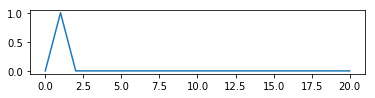

In [9]:
# visualisation de a
# on ajoute a droite la valeur de gauche pour la periodicite
plt.subplot(311)
plt.plot( np.append(a, a[0]) )

In [13]:
# calcul de A
A = np.fft.fft(a)
A

array([ 1.00000000e+00+0.00000000e+00j,  9.51056516e-01-3.09016994e-01j,
        8.09016994e-01-5.87785252e-01j,  5.87785252e-01-8.09016994e-01j,
        3.09016994e-01-9.51056516e-01j,  0.00000000e+00-1.00000000e+00j,
       -3.09016994e-01-9.51056516e-01j, -5.87785252e-01-8.09016994e-01j,
       -8.09016994e-01-5.87785252e-01j, -9.51056516e-01-3.09016994e-01j,
       -1.00000000e+00+5.55111512e-17j, -9.51056516e-01+3.09016994e-01j,
       -8.09016994e-01+5.87785252e-01j, -5.87785252e-01+8.09016994e-01j,
       -3.09016994e-01+9.51056516e-01j, -5.55111512e-17+1.00000000e+00j,
        3.09016994e-01+9.51056516e-01j,  5.87785252e-01+8.09016994e-01j,
        8.09016994e-01+5.87785252e-01j,  9.51056516e-01+3.09016994e-01j])

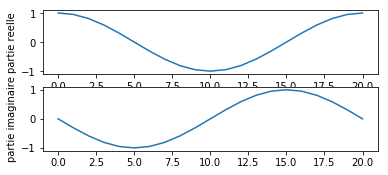

In [15]:
# visualisation de A
# on ajoute a droite la valeur de gauche pour la periodicite
B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B))
plt.ylabel("partie reelle")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("partie imaginaire")

plt.show()

# Visualisation des valeurs complexes avec une échelle colorée

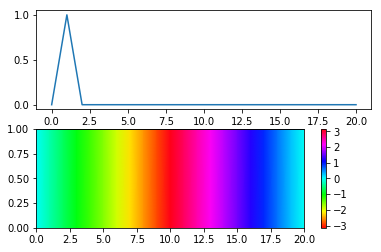

In [17]:
plt.subplot(211)
plt.plot( np.append(a, a[0]) )

# calcul de k
k = np.arange(n)

# calcul de A
A = np.fft.fft(a)

# visualisation de A - Attention au changement de variable
# on ajoute a droite la valeur de gauche pour la periodicite
plt.subplot(212)
x = np.append(k, k[-1]+k[1]-k[0]) # calcul d'une valeur supplementaire
z = np.append(A, A[0])
X = np.array([x,x])

y0 = np.zeros(len(x))
y = np.abs(z)
Y = np.array([y0,y])

Z = np.array([z,z])
C = np.angle(Z)

plt.plot(x,y,'k')

plt.pcolormesh(X, Y, C, shading="gouraud", cmap=plt.cm.hsv, vmin=-np.pi, vmax=np.pi)
plt.colorbar()

plt.show()

# Exemple avec cosinus

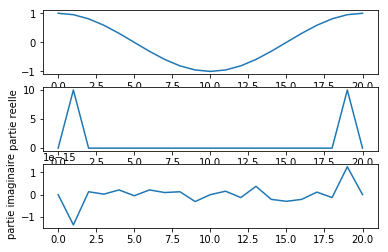

In [22]:
n = 20

# definition de a
m = np.arange(n)
a = np.cos(m * 2*np.pi/n)

# visualisation de a
# on ajoute a droite la valeur de gauche pour la periodicite
plt.subplot(311)
plt.plot( np.append(a, a[0]) )

# calcul de A
A = np.fft.fft(a)

# visualisation de A
# on ajoute a droite la valeur de gauche pour la periodicite
B = np.append(A, A[0])
plt.subplot(312)
plt.plot(np.real(B))
plt.ylabel("partie reelle")

plt.subplot(313)
plt.plot(np.imag(B))
plt.ylabel("partie imaginaire")

plt.show()

In [ ]:
Exemple avec cosinus sans prise en compte de la période dans l’affichage

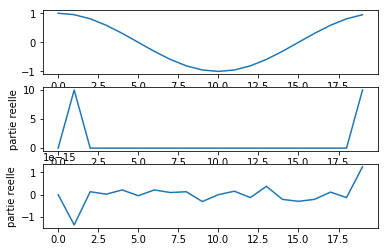

In [28]:
n = 20

# definition de a
m = np.arange(n)
a = np.cos(m * 2*np.pi/n)

# visualisation de a
plt.subplot(311)
plt.plot(a)

# calcul de A
A = np.fft.fft(a)

# visualisation de A
plt.subplot(312)
plt.plot(np.real(A))
plt.ylabel("partie reelle")

plt.subplot(313)
plt.plot(np.imag(A))
plt.ylabel("partie reelle")

plt.show()

# Fonction fftfreq

numpy.fft.fftfreq renvoie les fréquences du signal calculé dans la DFT.

Le tableau freq renvoyé contient les fréquences discrètes en nombre de cycles par pas de temps. Par exemple si le pas de temps est en secondes, alors les fréquences seront données en cycles/seconde.

Si le signal contient n pas de temps et que le pas de temps vaut d :

freq = [0, 1, …, n/2-1, -n/2, …, -1] / (d*n) si n est pair

freq = [0, 1, …, (n-1)/2, -(n-1)/2, …, -1] / (d*n) si n est impair

In [ ]:
dans notre exemple: n=100 (=len(t)) et d=dt=0.1

# freq [ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9 -5.  -4.9 -4.8 -4.7 -4.6 -4.5
 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1
 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7
 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3
 -0.2 -0.1]


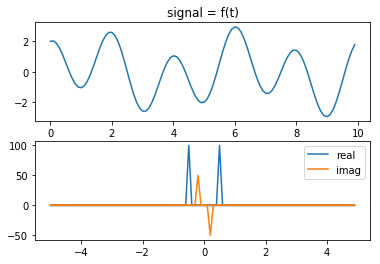

In [32]:
# definition du signal
dt = 0.1
T1 = 2
T2 = 5
t = np.arange(0, T1*T2, dt)
signal = 2*np.cos(2*np.pi/T1*t) + np.sin(2*np.pi/T2*t)

# affichage du signal
plt.subplot(211)
plt.plot(t,signal)
plt.title("signal = f(t)")

# calcul de la transformee de Fourier et des frequences
fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=dt)
print("# freq",freq)

# affichage de la transformee de Fourier
plt.subplot(212)
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()

plt.show()

# Fonction fftshift

In [40]:
n = 8
dt = 0.1
freq = np.fft.fftfreq(n, d=dt)
print("freq", freq)
f = np.fft.fftshift(freq)
print("shift freq",f)
inv_f = np.fft.ifftshift(f)
print("inv_f",inv_f)

freq [ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]
shift freq [-5.   -3.75 -2.5  -1.25  0.    1.25  2.5   3.75]
inv_f [ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]


# Approximation de la transformée de Fourier grâce à la FFT

Lorsqu’on désire calculer la transformée de Fourier d’une fonction x(t) à l’aide d’un ordinateur, ce dernier ne travaille que sur des valeurs discrètes, on est amené à :

discrétiser la fonction temporelle,
tronquer la fonction temporelle,
discrétiser la fonction fréquentielle.
X(f)=∫−∞+∞x(t)e−2πiftdt

En approchant l’intégrale par une somme d’aires de rectangles de durée Δt et en limitant la durée d’intégration à un intervalle de longueur nΔt, c’est-à-dire en faisant une somme pour n valeurs tm=mΔt avec m allant de 0 à n−1, on obtient :

X(f)≈Δt∑m=0n−1x(tm)e−2πiftm

Or, si on choisit des fréquences discrètes telles que fk=k1nΔt, on a fktm=k1nΔtmΔt=mkn:

X(fk)≈Δt∑m=0n−1x(tm)e−2πifktm≈Δt∑m=0n−1x(tm)e−2πimkn≈Δtfft(x)

Pour vérifier notre calcul, nous avons utilisé une transformée de Fourier connue. En effet, pour la définition utilisée, la transformée de Fourier d’une gaussienne e−αt2 est donnée par :

πα−−√e−(πf)2α ==>np.sqrt(alpha/pi) x exp(-(pi*f)^2/alpha)


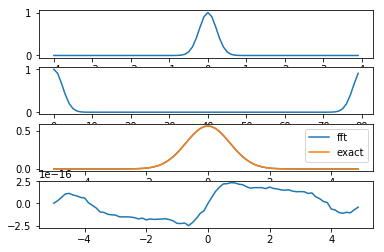

In [42]:
alpha = 10

nc = 40
dt = 0.1
tmax = (nc-1) * dt
tmin = -nc * dt

# definition d'un signal gaussien
t = np.linspace(tmin, tmax, 2*nc)
x = np.exp(-alpha * t**2)

plt.subplot(411)
plt.plot(t,x)

# on effectue un ifftshift pour positionner le temps zero comme premier element
plt.subplot(412)
a = np.fft.ifftshift(x)
plt.plot(a)

A = np.fft.fft(a)
# on effectue un fftshift pour positionner la frequence zero au centre
X = dt*np.fft.fftshift(A)

# calcul des frequences avec fftfreq
n = t.size
freq = np.fft.fftfreq(n, d=dt)
f = np.fft.fftshift(freq)

# comparaison avec la solution exacte
plt.subplot(413)
plt.plot(f, np.real(X), label="fft")
plt.plot(f, np.sqrt(np.pi/alpha) * np.exp( -(np.pi*f)**2 / alpha), label="exact")
plt.legend()

plt.subplot(414)
plt.plot(f, np.imag(X))

plt.show()

# Approximation de la transformée de Fourier spatiale grâce à la FFT

In [87]:
# https://courspython.com/fft-spatiale.html

Nous allons considérer l’expression suivante pour la transformée de Fourier :

g(k)=12π√∫−∞+∞f(x)e−ikxdx

Lorsqu’on désire calculer la transformée de Fourier de la fonction f(x) à l’aide d’un ordinateur, ce dernier ne travaille que sur des valeurs discrètes, on est amené à :

discrétiser la fonction spatiale,
tronquer la fonction spatiale,
discrétiser la fonction des fréquences spatiales.
En approchant l’intégrale par une somme d’aires de rectangles de largeur Δx et en limitant la domaine d’intégration à un intervalle de longueur nΔx, c’est-à-dire en faisant une somme pour n valeurs xm=mΔx avec m allant de 0 à n−1, on obtient :

g(k)≈Δx2π√∑m=0n−1f(xm)e−ikxm

Or, si on choisit des fréquences spatiales discrètes telles que kj=j2π/nΔx, on a kj * xm=j2π/nΔx * (mΔx)=2πjm/n:

g(kj)≈Δx2π√∑m=0n−1f(xm)e−ikjxm≈Δx2π√∑m=0n−1f(xm)e−2πijmn≈Δx2π√fft(f)

Pour vérifier notre calcul, nous avons utilisé une transformée de Fourier connue. 
En effet, pour la définition utilisée, la transformée de Fourier d’une gaussienne e−αx22 est donnée par :

1α√e−k22α

cette transformée est différente du cas non spatial (il n y pas de pi)

### Exemple dans le cas d’une gaussienne

C:\Users\Hanane\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


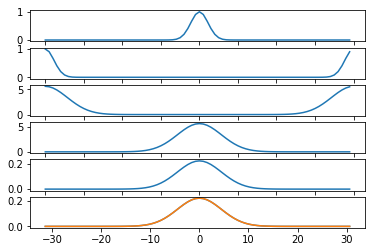

In [101]:
alpha = 20

nc = 40
dx = 0.1
xmax = (nc-1) * dx
xmin = -nc * dx

# definition d'un signal gaussien
x = np.linspace(xmin, xmax, 2*nc)
f = np.exp(-alpha/2 * x**2)

plt.subplot(611)
plt.plot(x,f)

F=np.fft.ifftshift(f)
plt.subplot(612)
plt.plot(F)

Spectre=np.fft.fft(F)
plt.subplot(613)
plt.plot(Spectre)

Spectre_int=np.fft.fftshift(Spectre)
plt.subplot(614)
plt.plot(Spectre_int)

Spectre_final=(dx/np.sqrt(2*np.pi))*Spectre_int
plt.subplot(615)
plt.plot(Spectre_final)

n=x.size
freq=2*np.pi*np.fft.fftfreq(n,dx)
f=np.fft.fftshift(freq)

plt.subplot(616)
plt.plot(f,np.real(Spectre_final),label="fft")
plt.plot(f,(np.sqrt(1/alpha)*np.exp(-(f)**2/(2*alpha))),label="tf connue")


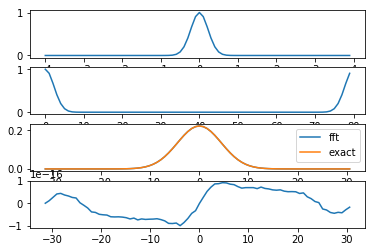

In [102]:
alpha = 20

nc = 40
dx = 0.1
xmax = (nc-1) * dx
xmin = -nc * dx

# definition d'un signal gaussien
x = np.linspace(xmin, xmax, 2*nc)
f = np.exp(-alpha/2 * x**2)

plt.subplot(411)
plt.plot(x,f)

# on effectue un ifftshift pour positionner le temps zero comme premier element
plt.subplot(412)
a = np.fft.ifftshift(f)
plt.plot(a)

A = np.fft.fft(a)
# on effectue un fftshift pour positionner la frequence zero au centre
g = dx/np.sqrt(2*np.pi)*np.fft.fftshift(A)

# calcul des frequences avec fftfreq
# A noter la multiplication 2*pi qui est différente du cas d'avant (le cas non spatial)
n = x.size
freq = 2*np.pi * np.fft.fftfreq(n, d=dx)
k = np.fft.fftshift(freq)

# comparaison avec la solution exacte
plt.subplot(413)
plt.plot(k, np.real(g), label="fft")
plt.plot(k, 1/np.sqrt(alpha) * np.exp( -k**2 / (2*alpha)), label="exact")
plt.legend()

plt.subplot(414)
plt.plot(k, np.imag(g))

plt.show()